# ML Classifiers
ML classifier: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
CountVectorizer() class: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/ 
xgb: https://xgboost.readthedocs.io/en/latest/python/python_api.html
confusion matrix: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


In [ ]:
# import libraries 
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# change file path accordingly 
data = pd.read_csv('/content/gdrive/MyDrive/Depression Project/DepressionDataFinal2ProcessedStemLem.csv')
# read first 5 lines of data
data.head()

,Id,Text,Target
0,2.850000e+17,one thing love life mother one ever come mine,1
1,2.900000e+17,want perfect want happi,0
2,2.860000e+17,mom hate dad hate today suck fword life tho,0
3,2.860000e+17,hate hate life,0
4,2.860000e+17,feel good,1


In [ ]:
data.columns

Index(['Id', 'Text', 'Target'], dtype='object')

In [ ]:
# number of null value 
data.isnull().sum()

Id        0
Text      8
Target    0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Id        0
Text      0
Target    0
dtype: int64

In [ ]:
data.shape

(8807, 3)

In [ ]:
data.sort_index(inplace=True)
data.tail()

,Id,Text,Target
8810,2.900000e+17,guess good thing,1
8811,2.900000e+17,na i feel bless,1
8812,2.850000e+17,😭 life suck,0
8813,2.900000e+17,worst headach,0
8814,2.900000e+17,disappoint also hahah 😔,0


In [ ]:
data.columns

Index(['Id', 'Text', 'Target'], dtype='object')

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
# learn the vocabulary
all_features = vectorizer.fit_transform(data.Text)

In [ ]:
# 5720 - individual words 
all_features.shape

(8807, 1548)

In [ ]:
# show the vocabulary in the vectorizer
vectorizer.vocabulary_

{'thing': 1327,
 'love': 845,
 'life': 804,
 'mother': 927,
 'come': 279,
 'want': 1425,
 'perfect': 1033,
 'happi': 646,
 'mom': 918,
 'hate': 655,
 'dad': 333,
 'today': 1343,
 'suck': 1268,
 'fword': 559,
 'tho': 1332,
 'feel': 512,
 'good': 596,
 'singl': 1197,
 'tf': 1312,
 'live': 821,
 '2013': 10,
 'spoil': 1242,
 'believ': 164,
 'realiti': 1101,
 'bless': 189,
 '15factsaboutm': 2,
 'wish': 1454,
 'ti': 1340,
 'ame': 77,
 'chang': 257,
 '2012regret': 9,
 'best': 167,
 'year': 1493,
 'disappoint': 387,
 'memori': 894,
 'sword': 1292,
 'say': 1155,
 'ff': 517,
 'make': 866,
 'stop': 1253,
 'everi': 457,
 'mywishin2013': 938,
 'stay': 1249,
 'way': 1430,
 'better': 172,
 'someon': 1225,
 'care': 247,
 'real': 1099,
 'friend': 546,
 'dream': 404,
 'true': 1363,
 'everyth': 463,
 'great': 614,
 'idk': 716,
 'quit': 1091,
 'flat': 524,
 'tire': 1342,
 'sad': 1144,
 'content': 295,
 'tri': 1354,
 'kid': 768,
 'like': 815,
 'someti': 1227,
 'amesi': 79,
 'think': 1328,
 'peopl': 1032,
 

In [ ]:
# randomly shuffle dataset
data.sample(frac=1, random_state=42)

,Id,Text,Target
4975,2.900000e+17,ye life complet made day,1
3367,2.850000e+17,i good,1
5500,2.850000e+17,0 friend,0
1692,2.850000e+17,feel good 3,1
1350,2.900000e+17,lot fun,1
...,...,...,...
5740,2.900000e+17,realli hate everyth,0
5197,2.900000e+17,wait best girlfriend,1
5396,2.900000e+17,want,1
860,2.860000e+17,glad true friend,1


In [ ]:
# split into train and test data and shuffle the data 

In [ ]:
# data.target - labels 
# test_size = 0.3 - 30% of data is test data 
# random_state - set a seed to random generator
x_train, x_test, y_train, y_test = train_test_split(all_features, data.Target, test_size=0.3, random_state=88)

In [ ]:
x_train.shape

(6164, 1548)

In [ ]:
x_test.shape

(2643, 1548)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

(200, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:54:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(400, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(600, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:54:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(800, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:54:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(1000, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(1200, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:55:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(1400, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(1600, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:55:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(1800, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:55:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(2000, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:55:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(2200, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(2400, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(2600, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(2800, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(3000, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:57:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(3200, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:57:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(3400, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(3600, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:58:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(3800, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:59:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(4000, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[11:59:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(4200, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:00:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(4400, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(4600, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(4800, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:02:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(5000, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(5200, 1548)
[12:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(5400, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:04:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(5600, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:05:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(5800, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(6000, 1548)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



[12:07:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


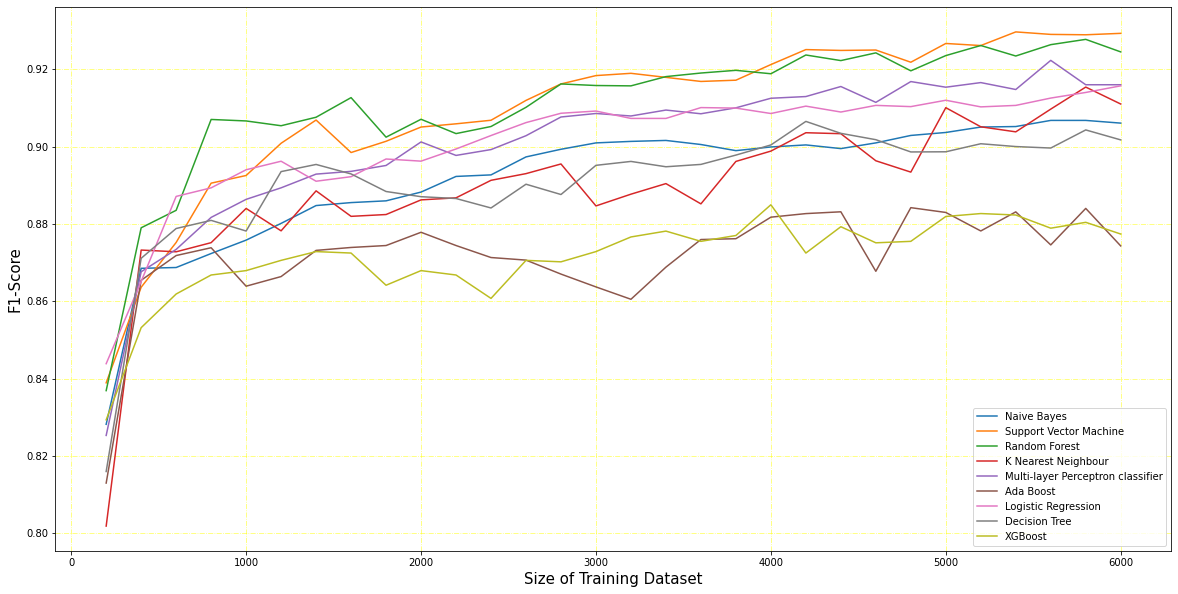

In [ ]:
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
h=[]
j=[]
k=[]

 
for i in range (200,6160,200):
#for i in range (2000, 5832, 2000):
    
    #set x_train and y_train 
    subset_xtrain = x_train[0:i,:]
    subset_ytrain = y_train[0:i]
    print(subset_xtrain.shape)
    
    # create the classfier 
    NaiveBayes = MultinomialNB()
    LogReg = LogisticRegression()
    SupportVecMach = svm.SVC()
    RandomForest = RandomForestClassifier()
    KNeighbour = KNeighborsClassifier()
    MLPC = MLPClassifier()
    AdaBoost = AdaBoostClassifier()
    DecisionTree = tree.DecisionTreeClassifier()
    XGBoost = xgb.XGBRegressor()

    # train the model 
    NaiveBayes.fit(subset_xtrain, subset_ytrain)
    LogReg.fit(subset_xtrain, subset_ytrain)
    SupportVecMach.fit(subset_xtrain, subset_ytrain)
    RandomForest.fit(subset_xtrain, subset_ytrain)
    KNeighbour.fit(subset_xtrain, subset_ytrain)
    MLPC.fit(subset_xtrain, subset_ytrain)
    AdaBoost.fit(subset_xtrain, subset_ytrain)
    DecisionTree.fit(subset_xtrain, subset_ytrain)
    XGBoost.fit(subset_xtrain, subset_ytrain)


    # predict the response for test dataset
    y_predictNB = NaiveBayes.predict(x_test)
    y_predictLR = LogReg.predict(x_test)
    y_predictSVM = SupportVecMach.predict(x_test)
    y_predictRF = RandomForest.predict(x_test)
    y_predictKN = KNeighbour.predict(x_test)
    y_predictMLPC = MLPC.predict(x_test)
    y_predictAB = AdaBoost.predict(x_test)
    y_predictDT = DecisionTree.predict(x_test)
    y_predictXGB = XGBoost.predict(x_test)


    # calculate the F1 score 
    scoreNB = f1_score(y_test, y_predictNB)
    scoreLR = f1_score(y_test, y_predictLR)
    scoreSVM = f1_score(y_test, y_predictSVM)
    scoreRF = f1_score(y_test, y_predictRF)
    scoreKN = f1_score(y_test, y_predictKN)
    scoreMLPC = f1_score(y_test,y_predictMLPC)
    scoreAB = f1_score(y_test, y_predictAB)
    scoreDT = f1_score(y_test, y_predictDT)
    scoreXGB = f1_score(y_test, y_predictXGB.round(), average='micro')
    

    # add F1 score to a list
    a.append(i)
    b.append(scoreNB)
    c.append(scoreSVM)
    d.append(scoreRF)
    e.append(scoreKN)
    f.append(scoreMLPC)
    g.append(scoreAB)
    h.append(scoreLR)
    j.append(scoreDT)
    k.append(scoreXGB)
    
# set graph size 
plt.figure(figsize=(20,10))
# plot graph
plt.plot(a,b, label = "Naive Bayes")
plt.plot(a,c, label = "Support Vector Machine")
plt.plot(a,d , label = "Random Forest")
plt.plot(a,e, label = "K Nearest Neighbour")
plt.plot(a,f, label = "Multi-layer Perceptron classifier")
plt.plot(a,g, label = "Ada Boost")
plt.plot(a,h, label = "Logistic Regression")
plt.plot(a, j, label = "Decision Tree")
plt.plot(a, k, label = "XGBoost")
plt.xlabel('Size of Training Dataset', fontsize=15)
plt.ylabel('F1-Score', fontsize=15)
# set grid 
plt.grid(b=True, color='yellow', alpha=0.6, linestyle='dashdot')
# create a legend 
plt.legend(loc="lower right")
plt.show()

In [ ]:
NB = "\nnaive bayes classifier\n"
NBtitle = NB.title()
print(NBtitle)
CmNb = confusion_matrix(y_test,y_predictNB)
print(CmNb)
print(classification_report(y_test,y_predictNB))
print("Accuracy: ", accuracy_score(y_test, y_predictNB))
print("F1: ", f1_score(y_test, y_predictNB))
print("Precision: ", precision_score(y_test, y_predictNB))
print("Recall: ", recall_score(y_test, y_predictNB))


LR = "\nlogistsic regression classifier\n"
LRtitle = LR.title()
print(LRtitle)
print(confusion_matrix(y_test,y_predictLR))
print(classification_report(y_test,y_predictLR))
print("Accuracy: ", accuracy_score(y_test, y_predictLR))
print("F1: ", f1_score(y_test, y_predictLR))
print("Precision: ", precision_score(y_test, y_predictLR))
print("Recall: ", recall_score(y_test, y_predictLR))

SVM = "\nsupport vector machine classifier\n"

SVMtitle = SVM.title()
print(SVMtitle)
CmSvm = confusion_matrix(y_test,y_predictSVM)
print(confusion_matrix(y_test,y_predictSVM))
print(classification_report(y_test,y_predictSVM))
print("Accuracy: ", accuracy_score(y_test, y_predictSVM))
print("F1: ", f1_score(y_test, y_predictSVM))
print("Precision: ", precision_score(y_test, y_predictSVM))
print("Recall: ", recall_score(y_test, y_predictSVM))

RF = "\nrandom forest classifier\n"
RFtitle = RF.title()
print(RFtitle)
CmRf = confusion_matrix(y_test,y_predictRF)
print(confusion_matrix(y_test,y_predictRF))
print(classification_report(y_test,y_predictRF))
print("Accuracy: ", accuracy_score(y_test, y_predictRF))
print("F1: ", f1_score(y_test, y_predictRF))
print("Precision: ", precision_score(y_test, y_predictRF))
print("Recall: ", recall_score(y_test, y_predictRF))

KNN = "\nk nearest neighbour classifier\n"
KNNtitle = KNN.title()
print(KNNtitle)
CmKn = confusion_matrix(y_test,y_predictKN)
print(confusion_matrix(y_test,y_predictKN))
print(classification_report(y_test,y_predictKN))
print("Accuracy: ", accuracy_score(y_test, y_predictKN))
print("F1: ", f1_score(y_test, y_predictKN))
print("Precision: ", precision_score(y_test, y_predictKN))
print("Recall: ", recall_score(y_test, y_predictKN))

MLPC = "\nmulti-layer perceptron classifier\n"
MLPCtitle = MLPC.title()
print(MLPCtitle)
print(confusion_matrix(y_test,y_predictMLPC))
print(classification_report(y_test,y_predictMLPC))
print("Accuracy: ", accuracy_score(y_test, y_predictMLPC))
print("F1: ", f1_score(y_test, y_predictMLPC))
print("Precision: ", precision_score(y_test, y_predictMLPC))
print("Recall: ", recall_score(y_test, y_predictMLPC))

AB = "\nada boost classifier\n"
ABtitle = AB.title()
print(ABtitle)
CmAb = confusion_matrix(y_test,y_predictAB)
print(confusion_matrix(y_test,y_predictAB))
print(classification_report(y_test,y_predictAB))
print("Accuracy: ", accuracy_score(y_test, y_predictAB))
print("F1: ", f1_score(y_test, y_predictAB))
print("Precision: ", precision_score(y_test, y_predictAB))
print("Recall: ", recall_score(y_test, y_predictAB))

DT = "\ndecision tree classifier\n"
DTtitle = DT.title()
print(DTtitle)
print(confusion_matrix(y_test,y_predictDT))
print(classification_report(y_test,y_predictDT))
print("Accuracy: ", accuracy_score(y_test, y_predictDT))
print("F1: ", f1_score(y_test, y_predictDT))
print("Precision: ", precision_score(y_test, y_predictDT))
print("Recall: ", recall_score(y_test, y_predictDT))

XGB = "\nXG boost classifier\n"
XGBtitle = XGB.title()
print(XGBtitle)
print(confusion_matrix(y_test,y_predictXGB.round()))
print(classification_report(y_test,y_predictXGB.round()))
print("Accuracy: ", accuracy_score(y_test, y_predictXGB.round()))
print("F1: ", f1_score(y_test, y_predictXGB.round()))
print("Precision: ", precision_score(y_test, y_predictXGB.round()))
print("Recall: ", recall_score(y_test, y_predictXGB.round()))




Naive Bayes Classifier

[[1082  143]
 [ 125 1293]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1225
           1       0.90      0.91      0.91      1418

    accuracy                           0.90      2643
   macro avg       0.90      0.90      0.90      2643
weighted avg       0.90      0.90      0.90      2643

Accuracy:  0.8986000756715853
F1:  0.9060967063770147
Precision:  0.9004178272980501
Recall:  0.9118476727785614

Logistsic Regression Classifier

[[1086  139]
 [ 103 1315]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1225
           1       0.90      0.93      0.92      1418

    accuracy                           0.91      2643
   macro avg       0.91      0.91      0.91      2643
weighted avg       0.91      0.91      0.91      2643

Accuracy:  0.9084373817631479
F1:  0.9157381615598885
Precision:  0.9044016506189821
Recall:  0.9273624823695346

Suppor

In [ ]:
print ("-------- Dataset with stemming and lemmatization ----------")

NB = "\nnaive bayes classifier\n"
NBtitle = NB.title()
print(NBtitle)
# print(confusion_matrix(y_test,y_predictNB))
# print(classification_report(y_test,y_predictNB))
print("accuracy to 4 d.p.: ",accuracy_score(y_test, y_predictNB))

LR = "\nlogistsic regression classifier\n"
LRtitle = LR.title()
print(LRtitle)
# print(confusion_matrix(y_test,y_predictLR))
# print(classification_report(y_test,y_predictLR))
print("accuracy to 4 d.p.: ",accuracy_score(y_test, y_predictLR))

SVM = "\nsupport vector machine classifier\n"

SVMtitle = SVM.title()
print(SVMtitle)
# print(confusion_matrix(y_test,y_predictSVM))
# print(classification_report(y_test,y_predictSVM))
print("accuracy to 4 d.p.: ",accuracy_score(y_test, y_predictSVM))

RF = "\nrandom forest classifier\n"
RFtitle = RF.title()
print(RFtitle)
# print(confusion_matrix(y_test,y_predictRF))
# print(classification_report(y_test,y_predictRF))
print("accuracy to 4 d.p.: ",accuracy_score(y_test, y_predictRF))

KNN = "\nk nearest neighbour classifier\n"
KNNtitle = KNN.title()
print(KNNtitle)
# print(confusion_matrix(y_test,y_predictKN))
# print(classification_report(y_test,y_predictKN))
print("accuracy to 4 d.p.: ", accuracy_score(y_test, y_predictKN))

MLPC = "\nmulti-layer perceptron classifier\n"
MLPCtitle = MLPC.title()
print(MLPCtitle)
# print(confusion_matrix(y_test,y_predictMLPC))
# print(classification_report(y_test,y_predictMLPC))
print("accuracy to 4 d.p.: ", accuracy_score(y_test, y_predictMLPC))

AB = "\nada boost classifier\n"
ABtitle = AB.title()
print(ABtitle)
# print(confusion_matrix(y_test,y_predictAB))
# print(classification_report(y_test,y_predictAB))
print("accuracy to 4 d.p.: ", accuracy_score(y_test, y_predictAB))

DT = "\ndecision tree classifier\n"
DTtitle = DT.title()
print(DTtitle)
# print(confusion_matrix(y_test,y_predictDT))
# print(classification_report(y_test,y_predictDT))
print("accuracy to 4 d.p.: ", accuracy_score(y_test, y_predictDT))

XGB = "\nXG boost classifier\n"
XGBtitle = XGB.title()
print(XGBtitle)
# print(confusion_matrix(y_test,y_predictXGB))
# print(classification_report(y_test,y_predictXGB))
print("accuracy to 4 d.p.: ", accuracy_score(y_test, y_predictXGB.round()))



-------- Dataset with stemming and lemmatization ----------

Naive Bayes Classifier

accuracy to 4 d.p.:  0.8986000756715853

Logistsic Regression Classifier

accuracy to 4 d.p.:  0.9084373817631479

Support Vector Machine Classifier

accuracy to 4 d.p.:  0.9228149829738933

Random Forest Classifier

accuracy to 4 d.p.:  0.9175179720015134

K Nearest Neighbour Classifier

accuracy to 4 d.p.:  0.9023836549375709

Multi-Layer Perceptron Classifier

accuracy to 4 d.p.:  0.9099508134695422

Ada Boost Classifier

accuracy to 4 d.p.:  0.8664396519107075

Decision Tree Classifier

accuracy to 4 d.p.:  0.8921679909194098

Xg Boost Classifier

accuracy to 4 d.p.:  0.8774120317820658
